In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from helpers_plot import finalizePlot, initPlot

In [2]:
initPlot()

In [6]:
file_all="measurements/Lum1/NNMap/north.N2Map.dat"
meas_all=np.loadtxt(file_all)


N_jn=100
Nbins=20
res=np.zeros((N_jn, Nbins))

for i in range(1, N_jn):
    file=f"measurements/Lum1/NNMap/{i}.N2Map.dat"
    meas=np.loadtxt(file)[:,3]
    res[i]=meas

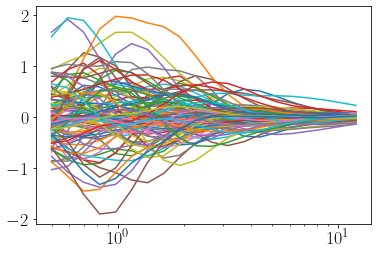

In [9]:
plt.xscale('log')
plt.plot(meas_all[:,0], meas_all[:,3])

for i in range(0, N_jn):
    plt.plot(meas_all[:,0],res[i])

In [20]:
print(np.shape(res))

print(np.shape(np.delete(res, 1, 0)))


(100, 20)
(99, 20)


<ErrorbarContainer object of 3 artists>

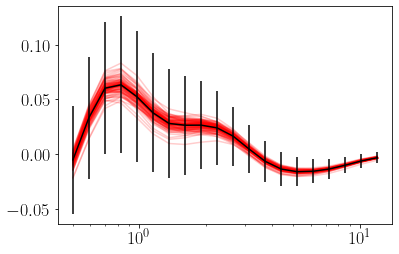

In [62]:
jn_samples=np.zeros((N_jn, Nbins))

for i in range(N_jn):
    jn_samples[i]=np.mean(np.delete(res, i, 0), axis=0)


for i in range(0, N_jn):
    plt.plot(meas_all[:,0],jn_samples[i], color='r', alpha=0.2)

cov=np.cov(jn_samples.T, bias=True)*(N_jn-1)


plt.xscale('log')
#plt.yscale('log')
plt.errorbar(meas_all[:,0],np.mean(jn_samples, axis=0), yerr=np.sqrt(np.diag(cov)), color='k')
#plt.errorbar(meas_all[:,0],meas_all[:,3], yerr=np.diag(cov), color='b')


In [64]:
np.sqrt(np.diag(cov))

array([0.0495692 , 0.05590924, 0.06068285, 0.06274247, 0.05988478,
       0.05464993, 0.04978796, 0.04551729, 0.04028967, 0.0338008 ,
       0.02707749, 0.02192036, 0.0185515 , 0.01578723, 0.01327382,
       0.0110454 , 0.00908668, 0.00743789, 0.00604704, 0.00486906])

In [27]:
meas_all[:,3]

array([ 0.0826439 ,  0.423864  ,  0.620491  ,  0.589221  ,  0.427541  ,
        0.258387  ,  0.140275  ,  0.0758381 ,  0.0461195 ,  0.0316092 ,
        0.0186292 ,  0.00452913, -0.00657036, -0.0115759 , -0.0119132 ,
       -0.0107136 , -0.00921025, -0.0072976 , -0.0052474 , -0.00359644])

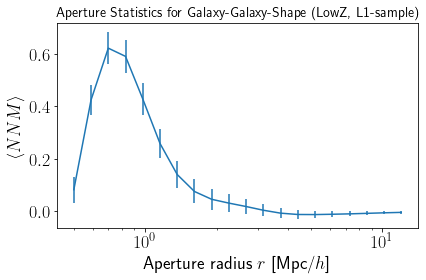

In [81]:
fig, ax=plt.subplots()


ax.set_xscale('log')
#ax.ylim(-0.9,0.9)
#plt.yscale('log')
ax.errorbar(meas_all[:,0], (meas_all[:,3]), yerr=np.sqrt(np.diag(cov)))

ax.set_xlabel(r"Aperture radius $r$ [Mpc/$h$]")
ax.set_ylabel(r"$\langle NNM \rangle$")

finalizePlot(ax, "Aperture Statistics for Galaxy-Galaxy-Shape (LowZ, L1-sample)", showlegend=False)


In [72]:
meas_all[:,3]/np.sqrt(np.diag(cov))

array([ 1.66724299,  7.58128659, 10.22514681,  9.39110255,  7.13939385,
        4.7280388 ,  2.81744844,  1.66613833,  1.14469783,  0.93516133,
        0.68799588,  0.20661752, -0.35416875, -0.7332447 , -0.8974958 ,
       -0.96996021, -1.01359952, -0.98113791, -0.8677628 , -0.73863112])

In [73]:
meas_all[:,0]

array([ 0.5     ,  0.591034,  0.698643,  0.825844,  0.976204,  1.15394 ,
        1.36404 ,  1.61239 ,  1.90595 ,  2.25296 ,  2.66316 ,  3.14804 ,
        3.72119 ,  4.39871 ,  5.19957 ,  6.14625 ,  7.26529 ,  8.58808 ,
       10.1517  , 12.      ])

In [29]:
gtilde_north=np.loadtxt("measurements/gtilde/north.gtilde_single.dat")
gtilde_south=np.loadtxt("measurements/gtilde/south.gtilde_single.dat")
gtilde_all=np.loadtxt("measurements/gtilde/all.gtilde.dat")
gtilde_north.shape
Nbins=50

In [30]:
gtilde_north_real=gtilde_north[:,6]
gtilde_north_imag=gtilde_north[:,7]
gtilde_north_weight=gtilde_north[:,8]


gtilde_north_real=gtilde_north_real.reshape(Nbins, Nbins, Nbins)
gtilde_north_imag=gtilde_north_imag.reshape(Nbins, Nbins, Nbins)
gtilde_north_weight=gtilde_north_weight.reshape(Nbins, Nbins, Nbins)


gtilde_south_real=gtilde_south[:,6]
gtilde_south_imag=gtilde_south[:,7]
gtilde_south_weight=gtilde_south[:,8]


gtilde_south_real=gtilde_south_real.reshape(Nbins, Nbins, Nbins)
gtilde_south_imag=gtilde_south_imag.reshape(Nbins, Nbins, Nbins)
gtilde_south_weight=gtilde_south_weight.reshape(Nbins, Nbins, Nbins)


gtilde_all_real=gtilde_all[:,6]
gtilde_all_imag=gtilde_all[:,7]
gtilde_all_weight=gtilde_all[:,8]


gtilde_all_real=gtilde_all_real.reshape(Nbins, Nbins, Nbins)
gtilde_all_imag=gtilde_all_imag.reshape(Nbins, Nbins, Nbins)
gtilde_all_weight=gtilde_all_weight.reshape(Nbins, Nbins, Nbins)


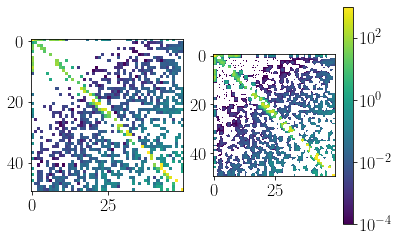

In [31]:
fig, ax = plt.subplots(ncols=2)
phibin=0
ax[0].imshow(gtilde_all_real[:,:,phibin]*gtilde_all_weight[:,:,phibin], norm=mpl.colors.LogNorm(vmin=1e-4, vmax=1e3))
im=ax[1].imshow(gtilde_north_real[:,:,phibin]*gtilde_north_weight[:,:,phibin]+gtilde_south_real[:,:,phibin]*gtilde_south_weight[:,:,phibin], norm=mpl.colors.LogNorm(vmin=1e-4, vmax=1e3))

fig.colorbar(im)



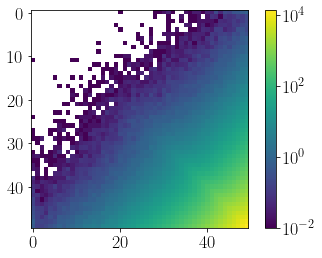

In [32]:
plt.imshow(gtilde_north_weight[:,:,1], norm=mpl.colors.LogNorm())
plt.colorbar()

In [33]:
north=np.loadtxt("measurements/NNMap/north.N2Map.dat")
south=np.loadtxt("measurements/NNMap/south.N2Map.dat")
all=np.loadtxt("measurements/NNMap/all.N2Map.dat")



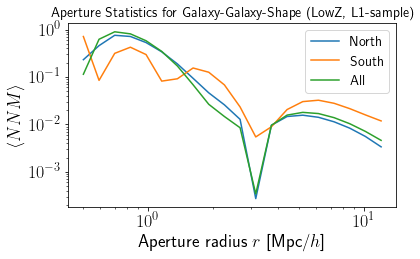

In [34]:
fig, ax=plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(north[:,0], np.abs(north[:,3]), label='North')
ax.plot(south[:,0], np.abs(south[:,3]), label='South')
ax.plot(all[:,0], np.abs(all[:,3]), label='All')

ax.hlines(0, min(north[:,0]), max(north[:,0]), color='k')
ax.set_xlabel(r"Aperture radius $r$ [Mpc/$h$]")
ax.set_ylabel(r"$\langle NNM \rangle$")

finalizePlot(ax, "Aperture Statistics for Galaxy-Galaxy-Shape (LowZ, L1-sample)")

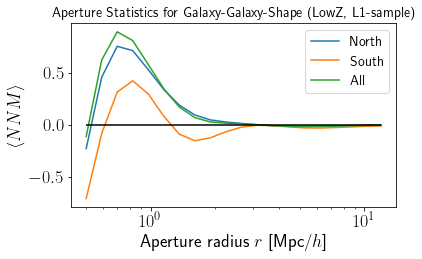

In [35]:
fig, ax=plt.subplots()

#ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(north[:,0], (north[:,3]), label='North')
ax.plot(south[:,0], (south[:,3]), label='South')
ax.plot(all[:,0], (all[:,3]), label='All')
#ax.plot(north[:,0], north[:,3]+south[:,3])

ax.hlines(0, min(north[:,0]), max(north[:,0]), color='k')
ax.set_xlabel(r"Aperture radius $r$ [Mpc/$h$]")
ax.set_ylabel(r"$\langle NNM \rangle$")

finalizePlot(ax, "Aperture Statistics for Galaxy-Galaxy-Shape (LowZ, L1-sample)")

In [37]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd


In [39]:
filename=r"data\north_density.fits"
data = Table.read(filename, format='fits').to_pandas()


In [43]:
data.head()

,RA,DEC,Z,e1,e2,WEIGHT_FKP,WEIGHT_CP,WEIGHT_NOZ,WEIGHT_STAR,WEIGHT_SEEING,WEIGHT_SYSTOT,Mu_ke0,Mg_ke0,Mr_ke0,Mi_ke0,Mz_ke0,DA,jackknife_ID,X,Y
0,195.211710,-0.505258,0.345888,0.158104,-0.076799,0.227029,1.0,1.0,1.0,1.0,1.0,-999.000000,-20.884115,-21.622444,-22.054237,-22.444876,710.940051,6,119.882099,-361.399158
1,225.586971,-0.046532,0.332610,0.107626,0.033516,0.226787,1.0,1.0,1.0,1.0,1.0,-19.535934,-20.940083,-21.751516,-22.148893,-22.532366,692.738176,21,484.062405,-346.600160
2,225.513692,-0.190260,0.332531,-0.055152,-0.128687,0.227034,1.0,1.0,1.0,1.0,1.0,-999.000000,-20.736992,-21.573034,-21.956991,-22.253622,692.627276,21,483.101583,-348.282145
3,195.095915,-1.063041,0.248512,-0.085485,0.213857,0.236770,1.0,1.0,1.0,1.0,1.0,-18.734627,-21.157776,-21.927965,-22.281872,-22.573008,563.920793,6,93.963805,-292.153261
4,195.210161,-1.064036,0.309910,0.173232,-0.271560,0.241339,1.0,1.0,1.0,1.0,1.0,-18.952906,-21.366879,-22.089720,-22.421467,-22.715347,660.334281,6,111.345734,-342.114139


In [52]:
dataJN0=data[data["jackknife_ID"]==7]

len(dataJN0)

1434